In [1]:
!pip install gensim


In [1]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [2]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471932530403137), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [93]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

In [3]:
gamer = model['gamer']
print(model.most_similar('gamer'))

[('gamers', 0.6373820900917053), ('geek', 0.5857683420181274), ('nerd', 0.5720980167388916), ('gadget', 0.5563002228736877), ('videogame', 0.5494627356529236), ('pc', 0.5321927070617676), ('playstation', 0.5189624428749084), ('console', 0.513917088508606), ('ds', 0.5124194622039795), ('xbox', 0.509954035282135)]


In [4]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.666556179523468), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.44406628608703613), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964928627014), ('pigs', 0.6755765080451965), ('animal', 0.6683687567710876)]


In [5]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736346244812), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772217750549316),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [ ]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

In [6]:
gaming=model["soccer"]-model["football"]

print(model.most_similar(gaming))
print(model.most_similar(-gaming))

model.most_similar(model["football"]+gaming)

[('yeargan', 0.4598349630832672), ('kapranova', 0.44751372933387756), ('fishawy', 0.4425981342792511), ('turespana', 0.4365955889225006), ('hendri', 0.4356082081794739), ('arcigay', 0.43461281061172485), ('ocabrera', 0.43142229318618774), ('chicheri', 0.4278782904148102), ('tanihara', 0.42520132660865784), ('borai', 0.42399507761001587)]
[('cumberland', 0.5042893290519714), ('wolverines', 0.489779531955719), ('quarterback', 0.48818543553352356), ('bulldogs', 0.4875696301460266), ('galloway', 0.48368510603904724), ('broncos', 0.47239819169044495), ('patriots', 0.4716140627861023), ('receiver', 0.4657963216304779), ('lancashire', 0.46512362360954285), ('lineman', 0.46484375)]


[('soccer', 1.0000001192092896),
 ('football', 0.8732219934463501),
 ('basketball', 0.8003971576690674),
 ('volleyball', 0.7690010070800781),
 ('hockey', 0.7440757751464844),
 ('league', 0.7424142360687256),
 ('sports', 0.7309418320655823),
 ('club', 0.7297094464302063),
 ('rugby', 0.7242490649223328),
 ('team', 0.715104877948761)]

Part 2: Visualization and Embeddings in Space

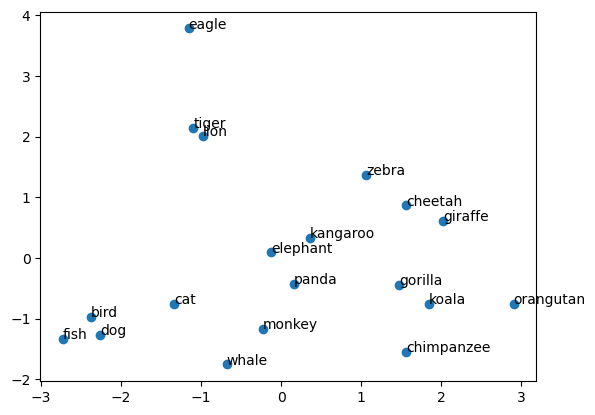

In [7]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

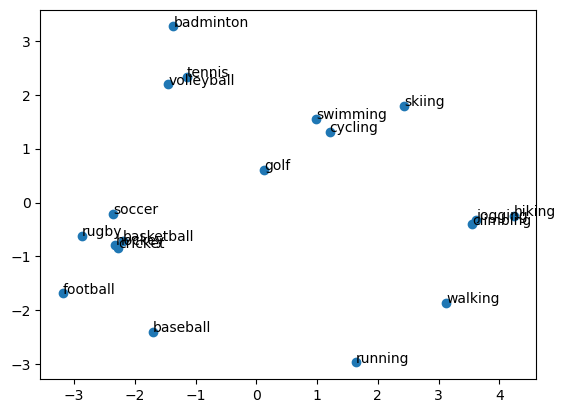

In [8]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=[ "football", "soccer", "basketball", "baseball", "tennis", "golf", "cricket", "rugby", "hockey", "volleyball", "badminton", "swimming", "cycling", "running", "jogging", "walking", "hiking", "climbing", "skiing"]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()




In [9]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


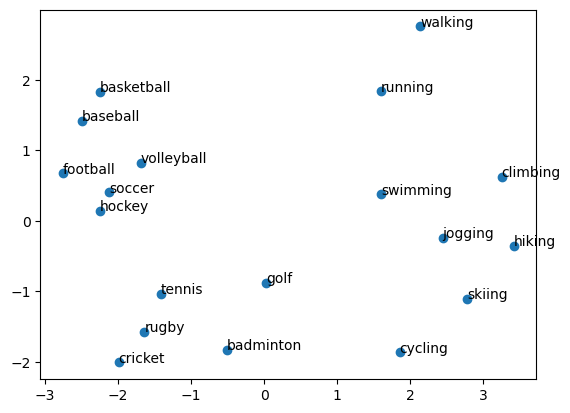

In [10]:
import gensim.downloader
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the pre-trained Twitter model
twitter_model = gensim.downloader.load("glove-twitter-100")

words = ["football", "soccer", "basketball", "baseball", "tennis", "golf", "cricket", "rugby", "hockey", "volleyball", "badminton", "swimming", "cycling", "running", "jogging", "walking", "hiking", "climbing", "skiing"]

X = [twitter_model[word] for word in words]

# Identify clusters of words in the word embeddings at high dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))

plt.show()

Part 3: Embedding reddit posts

In [11]:
#read in uiuc csv

import pandas as pd


uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [ ]:
#using the code from project 1, clean the text and create a bag of words representation of the text


In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

def clean(text):
    if isinstance(text, str):
        text = text.lower()  # Convert text to lowercase
        text = ''.join(char for char in text if char.isalnum() or char.isspace())  # Remove punctuation
    else:
        text = ''  # Handle non-string entries (e.g., NaN) by returning an empty string
    return text

# Example lemmatize function
def lemmatize(text):
    # Add your lemmatization steps here
    # For simplicity, let's assume this function returns the text as is
    return text

# Load data from a CSV file
file_path = "uiuc.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Define the words of interest
words_of_interest = ["racism", "football", "basketball", "class", "games"]

# Clean and lemmatize the text data
data['cleaned_text'] = data['text'].apply(clean)
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)

# Create a bag of words representation with count vectorizer
vectorizer = CountVectorizer(vocabulary=words_of_interest)
bag_of_words = vectorizer.fit_transform(data['lemmatized_text'])

# Convert the bag of words to a DataFrame for better readability
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

# Display the bag of words DataFrame
print(bow_df)

      racism  football  basketball  class  games
0          0         0           0      0      0
1          0         0           0      0      0
2          0         0           0      0      0
3          0         0           0      0      0
4          0         0           0      0      0
...      ...       ...         ...    ...    ...
4720       0         0           0      0      0
4721       0         0           0      0      0
4722       0         0           0      0      0
4723       0         0           0      0      0
4724       0         0           0      0      0

[4725 rows x 5 columns]


In [ ]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

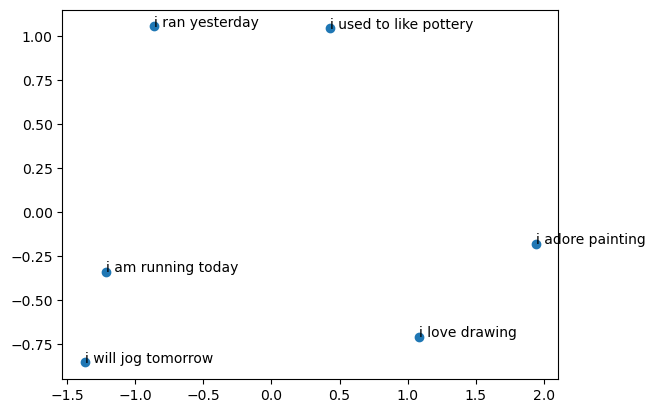

In [13]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, twitter_model):
    words=sentence.split()
    embeddings=[twitter_model[word] for word in words if word in twitter_model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, twitter_model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [ ]:

#use this function to calculate the average embedding of each post in the dataset
#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

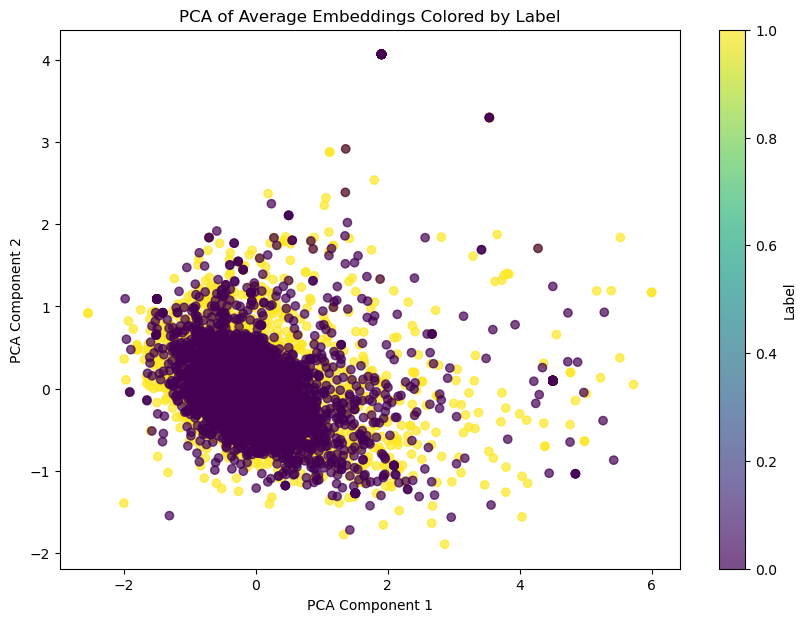

In [22]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Function to calculate the average embedding of a cleaned document
def avg_embedding(sentence, twitter_model):
    words = sentence.split()
    embeddings = [twitter_model[word] for word in words if word in twitter_model]
    if not embeddings:  # Check if embeddings list is empty
        return np.zeros(twitter_model.vector_size)  # Return a zero vector of appropriate size
    return np.mean(embeddings, axis=0)

# Load the datasets
uiuc = pd.read_csv("uiuc.csv")
mich = pd.read_csv("umich.csv")

# Sample so we have an even number of samples from each dataset
mich = mich.sample(n=4725)

# Assign labels based on the origin subreddit of the comment
uiuc['label'] = 1
mich['label'] = 0

# Combine the datasets
data = pd.concat([uiuc, mich])

# Clean and lemmatize the text data
data['cleaned_text'] = data['text'].apply(clean)
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)

# Extract sentences from the combined dataset
sentences = data['lemmatized_text'].tolist()

# Assuming twitter_model is already loaded and available
# Check if twitter_model is loaded
try:
    twitter_model
except NameError:
    raise ValueError("The 'twitter_model' is not loaded or defined.")

# Calculate the average embedding of each sentence
avg_embeddings = [avg_embedding(sentence, twitter_model) for sentence in sentences]

# Check if avg_embeddings is empty or contains inconsistent shapes
if not avg_embeddings:
    raise ValueError("The 'avg_embeddings' list is empty.")
if any(embedding.shape != avg_embeddings[0].shape for embedding in avg_embeddings):
    raise ValueError("Inconsistent shapes in 'avg_embeddings'.")

# Perform PCA on the average embeddings
pca = PCA(n_components=2)
X_pca = pca.fit_transform(avg_embeddings)

# Check if X_pca and sentences have the same length
if len(X_pca) != len(sentences):
    raise ValueError("Mismatch between the number of PCA results and sentences.")

# Plot the PCA results, colored by the "label" column
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Average Embeddings Colored by Label')
plt.show()

Part 4: HuggingFace and BERT

In [23]:
!pip install transformers

In [24]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [25]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [ ]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label

In [26]:
import pandas as pd
from transformers import pipeline
from collections import Counter

# Load the datasets
uiuc_file_path = "uiuc.csv"  # Replace with your actual file path
umich_file_path = "umich.csv"  # Replace with your actual file path

uiuc_data = pd.read_csv(uiuc_file_path)
umich_data = pd.read_csv(umich_file_path)

# Initialize a pre-trained sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Classify the sentiment of each post in the UIUC dataset
uiuc_data['sentiment'] = uiuc_data['text'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

# Classify the sentiment of each post in the UMICH dataset
umich_data['sentiment'] = umich_data['text'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

# Count the occurrences of each sentiment label for the UIUC dataset
uiuc_sentiment_counts = Counter(uiuc_data['sentiment'])

# Count the occurrences of each sentiment label for the UMICH dataset
umich_sentiment_counts = Counter(umich_data['sentiment'])

# Report the most common sentiment label for the UIUC dataset
uiuc_most_common_sentiment = uiuc_sentiment_counts.most_common(1)[0]
print(f"The most common sentiment label in the UIUC dataset is '{uiuc_most_common_sentiment[0]}' with {uiuc_most_common_sentiment[1]} occurrences.")

# Report the most common sentiment label for the UMICH dataset
umich_most_common_sentiment = umich_sentiment_counts.most_common(1)[0]
print(f"The most common sentiment label in the UMICH dataset is '{umich_most_common_sentiment[0]}' with {umich_most_common_sentiment[1]} occurrences.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Token indices sequence length is longer than the specified maximum sequence length for this model (993 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (993) must match the size of tensor b (512) at non-singleton dimension 1

In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 

In [ ]:
#is the UIUC or Michigan subreddit more negative?